## Technical Problem Statement

Climate change due to carbon dioxide (CO <sub>2</sub>) emissions is one of the most complex challenges threatening our planet. This issue considered as a great and international
Concern that primary attributed from different fossil fuels. 

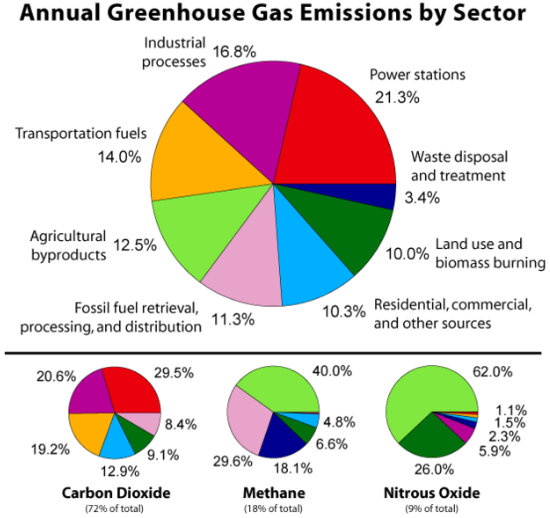


- To reduce the effect of Global Warming caused mainly due to cars(CO <sub>2</sub>) manufacturing companies are pre-estimating  the CO<sub>2</sub> emissions for a newly manufactured car that is about to launch in the near future based on the features of the car.
- This project deals with estimating the CO<sub>2</sub>  Emissions for a newly manufactured car by making Regression models which can accurately predetermine the car CO<sub>2</sub> emissions before it is being launched.

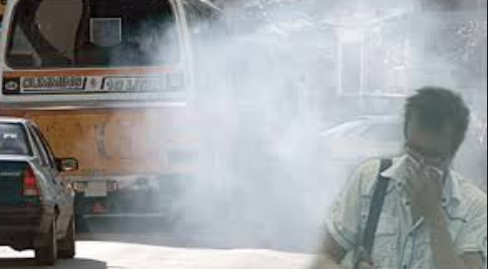

We have a sample dataset of year 2014 manufactured cars with their brands & other important specifications.lets see how we can design predetermine the co2 emision of a car.


### About Data Set 


The Data given here is for the Year 2014 manufactured Cars.
- YEAR – Year of manufacturing of car.
- MAKE – Manufacturing company name.
- VEHICLECLASS – Type of vehicles like SUV or medium-sized etc.
- ENGINESIZE – Size of the car’s engine (expressed in cc or cubic centimetre).
- CYLINDERS – Number of Cylinders in the engine.
- TRANSMISSION – Automatic or manual transmission with the number of gears.
- FUELTYPE – It indicates the type of fuel car use i.e. Diesel, Petrol, Z (Unleaded Petrol) etc.
- FUELCONSUMPTION_CITY – Fuel consumption or Fuel economy of car while running in city expressed in miles per gallon.
- FUELCONSUMPTION_HWY - Fuel Consumption or Fuel economy of car on highway expressed in miles per gallon.
- FUELCONSUMPTION_COMB – Net or combination of Fuel Economy expressed in miles per gallon.
- FUELCONSUMPTION_COMB_MPG – Total fuel economy expressed in miles per gallon.
- CO2EMISSIONS – The CO<sub>2</sub>  emitted by the car expressed in grams.


### Importing Data Set


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
c=pd.read_excel("F:\ML & Data Visualization\CO2 emission.xlsx")

In [3]:
c.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# Data Profiling
DataPre_report = pandas_profiling.ProfileReport(c)
DataPre_report.to_file(outputfile="myoutputfile.html")

In [17]:
## Identify the target variable 
c['FUELTYPE'],a = pd.factorize(c['FUELTYPE'])
c['VEHICLECLASS'],a = pd.factorize(c['VEHICLECLASS'])
c['TRANSMISSION'],a = pd.factorize(c['TRANSMISSION'])
c['MODEL'],a = pd.factorize(c['MODEL'])

c.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,0,0,2.0,4,0,0,9.9,6.7,8.5,33,196
1,2014,ACURA,0,0,2.4,4,1,0,11.2,7.7,9.6,29,221
2,2014,ACURA,1,0,1.5,4,2,0,6.0,5.8,5.9,48,136
3,2014,ACURA,2,1,3.5,6,3,0,12.7,9.1,11.1,25,255
4,2014,ACURA,3,1,3.5,6,3,0,12.1,8.7,10.6,27,244


In [18]:
# Dropping feilds MODEL YEAR & CYLINDERS
c = c.drop(['MODELYEAR','CYLINDERS','MAKE'], axis=1)
X = c.drop('CO2EMISSIONS', axis=1)
y = c[['CO2EMISSIONS']]

In [19]:
## we’ll split the dataset into a train set and a test set. 
## Scikit-learn has a very straightforward train_test_split function for that.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=1)

### Lets build the regression model. First, let’s try a model with only one variable

In [27]:
#CO2 EMISSION VERSES FUEL TYPE
reg = LinearRegression()
reg.fit(X_train[['ENGINESIZE']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Evaluation metrics for linear regression are mean squared error and the R² score.
y_predicted = reg.predict(X_test[['ENGINESIZE']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 955.37
R²: 0.76


In [ ]:
except e as exception 
try : 

### Insights

- The **best** possible score is **1.0**, We get a model with a mean squared error of **955.37** and an R² of**0.76**. 

In [29]:
reg = LinearRegression()
reg.fit(X_train[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']], y_train)
y_predicted = reg.predict(X_test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 590.67
R²: 0.85
